In [ ]:
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('/content/drive/MyDrive/Capstone/data/2024-05-16_annotation.sqlite3')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to extract SQL
cursor.execute("SELECT sql FROM sqlite_master WHERE type='table';")

# Fetch all rows containing SQL definitions
sql_rows = cursor.fetchall()

# Print the SQL definitions
for row in sql_rows:
    print(row[0])

# Close the cursor and connection
cursor.close()
conn.close()


CREATE TABLE users (
	login VARCHAR(30) NOT NULL, 
	created DATETIME NOT NULL, 
	hashed_password VARCHAR(192), 
	disabled BOOLEAN NOT NULL, 
	password_set_date DATETIME, 
	language VARCHAR(10), 
	email VARCHAR(256), 
	email_sent DATETIME, 
	CONSTRAINT pk_users PRIMARY KEY (login)
)
CREATE TABLE projects (
	id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, 
	name VARCHAR(200) NOT NULL, 
	description TEXT NOT NULL, 
	created DATETIME NOT NULL
)
CREATE TABLE sqlite_sequence(name,seq)
CREATE TABLE project_members (
	project_id INTEGER NOT NULL, 
	user_login VARCHAR(30) NOT NULL, 
	privileges VARCHAR(11) NOT NULL, 
	CONSTRAINT pk_project_members PRIMARY KEY (project_id, user_login), 
	CONSTRAINT fk_project_members_project_id_projects FOREIGN KEY(project_id) REFERENCES projects (id) ON DELETE CASCADE, 
	CONSTRAINT fk_project_members_user_login_users FOREIGN KEY(user_login) REFERENCES users (login) ON DELETE CASCADE ON UPDATE CASCADE
)
CREATE TABLE documents (
	id INTEGER NOT NULL PRIMARY KEY AU

In [ ]:
import pandas as pd

def sql_to_df(query):

  conn = sqlite3.connect('/content/drive/MyDrive/Capstone/data/2024-05-16_annotation.sqlite3')

  cursor = conn.cursor()

  cursor.execute(query)

  df = pd.read_sql_query(query, conn)


  conn.close()

  return df


In [ ]:
highlight_tags = sql_to_df('SELECT * FROM highlight_tags')
# highlight_tags.head(5)
highlight_tags.shape

(1373, 2)

In [ ]:
sql_to_df('SELECT * FROM highlights')

,id,document_id,start_offset,end_offset,snippet
0,1,3,130,215,<p>while also being removed enough from downto...
1,2,3,495,618,<p>I felt like I was being taught by professor...
2,3,3,727,827,<p>I also made some of my best friends at Barn...
3,4,3,1425,1567,<p>There is a lack of diversity! I am a Latina...
4,5,3,958,1013,"<p>There are fantastic resources, professors, ..."
...,...,...,...,...,...
658,659,2,45507,45624,<p>its one of the best university in the world...
659,660,2,45668,45715,<p>The academic experience so far has been ama...
660,661,2,45716,45752,<p> Great professors and course content</p>
661,662,2,45754,45841,<p>The thing really lacking is sense of commun...


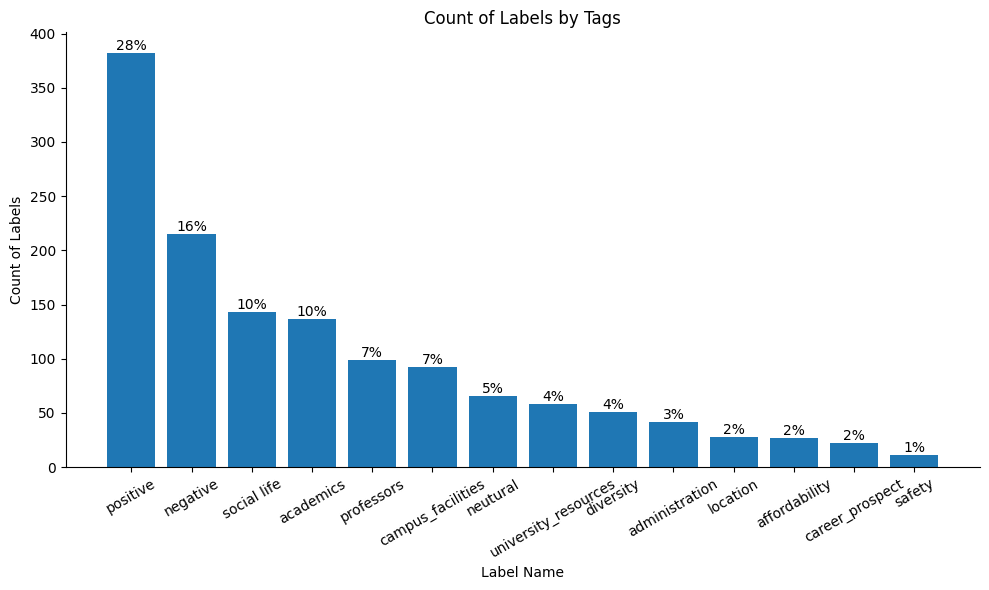

tag_name
positive                382
negative                215
social life             143
academics               137
professors               99
campus_facilities        92
neutural                 66
university_resources     58
diversity                51
administration           42
location                 28
affordability            27
career_prospect          22
safety                   11
Name: highlight_id, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

df_all_tag = sql_to_df(
    """SELECT highlight_id, document_id, tag_id, start_offset, end_offset, snippet AS text, path as tag_name
    FROM highlight_tags AS ht
    LEFT JOIN highlights AS h ON ht.highlight_id == h.id
    LEFT JOIN tags as t ON ht.tag_id == t.id

    """
    )
tag_counts = df_all_tag.groupby('tag_name').count()['highlight_id'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
bars = plt.bar(tag_counts.index, tag_counts.values) # You can change the color

# Adding titles and labels
plt.title('Count of Labels by Tags')
plt.xlabel('Label Name')
plt.ylabel('Count of Labels')
plt.xticks(rotation=30)  # Rotate the x-axis labels for better readability
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels

for bar in bars:
        yval = bar.get_height()
        # Calculate percentage and format as a string
        percentage = f'{yval/len(df_all_tag) * 100:.0f}%'
        plt.text(bar.get_x() + bar.get_width() / 2, yval, percentage,
                ha='center', va='bottom', color='black')

# Show the plot
plt.show()

tag_counts

In [ ]:
highlight = sql_to_df('SELECT * FROM highlights WHERE document_id == 3')
print(highlight.head(5))
highlight.shape

   id  document_id  start_offset  end_offset  \
0   1            3           130         215   
1   2            3           495         618   
2   3            3           727         827   
3   4            3          1425        1567   
4   5            3           958        1013   

                                             snippet  
0  <p>while also being removed enough from downto...  
1  <p>I felt like I was being taught by professor...  
2  <p>I also made some of my best friends at Barn...  
3  <p>There is a lack of diversity! I am a Latina...  
4  <p>There are fantastic resources, professors, ...  


(214, 5)

In [ ]:
tags = sql_to_df('SELECT * FROM tags')
tags

,id,project_id,path,description
0,1,1,interesting,Further review required
1,2,1,academics,"course flexibility, course content, academic r..."
2,3,1,administration,"factors related to management, administrative ..."
3,4,1,affordability,"cost-related facotrs, including tuition fee, r..."
4,5,1,campus_facilities,"campus housing, quality of food, academic faci..."
5,6,1,career_prospect,The factors related to employability aspects d...
6,7,1,diversity,"Campus diversity at each school, including rac..."
7,8,1,negative,unfavorable sentiment orientation towards an a...
8,9,1,neutural,favorable sentiment orientation towards an asp...
9,10,1,positive,neither favorable or unfavorable towards an as...


In [ ]:
sentiments = sql_to_df(
    """SELECT highlight_id, document_id, tag_id, start_offset, end_offset, snippet AS text, path as sentiment
    FROM highlight_tags AS ht
    LEFT JOIN highlights AS h ON ht.highlight_id == h.id
    LEFT JOIN tags as t ON ht.tag_id == t.id
    WHERE tag_id IN (8, 9, 10)
    """
    )
sentiments

,highlight_id,document_id,tag_id,start_offset,end_offset,text,sentiment
0,15,3,8,3314,3445,"<p>Due to the extremely urban campus, there is...",negative
1,22,3,8,4514,4638,<p>Wesleyan is in a really secluded part of CT...,negative
2,4,3,8,1425,1567,<p>There is a lack of diversity! I am a Latina...,negative
3,7,3,8,1892,1984,<p>There is very limited socioeconomic diversi...,negative
4,13,3,8,2858,2986,<p>Oklahoma State has a horrible undergraduate...,negative
...,...,...,...,...,...,...,...
658,655,2,10,44759,44797,<p>Super easy enrollment and class system</p>,positive
659,659,2,10,45507,45624,<p>its one of the best university in the world...,positive
660,661,2,10,45716,45752,<p> Great professors and course content</p>,positive
661,658,2,10,45355,45463,"<p>My professors are very talented, my departm...",positive


In [ ]:
topics = sql_to_df(

    """SELECT h.id AS highlight_id, start_offset, end_offset, snippet AS text, path as topic
    FROM highlights AS h
    LEFT JOIN highlight_tags AS ht on h.id == ht.highlight_id
    LEFT JOIN tags as t on ht.tag_id == t.id
    WHERE tag_id NOT IN (8, 9, 10)
    """)

# """SELECT highlight_id, document_id, tag_id, start_offset, end_offset, snippet AS text, path as topic
#     FROM highlight_tags AS ht
#     LEFT JOIN highlights AS h ON ht.highlight_id == h.id
#     LEFT JOIN tags as t ON ht.tag_id == t.id
#     WHERE tag_id NOT IN (14, 15, 16) and document_id == 3""")


topics

,highlight_id,start_offset,end_offset,text,topic
0,1,130,215,<p>while also being removed enough from downto...,campus_facilities
1,2,495,618,<p>I felt like I was being taught by professor...,professors
2,3,727,827,<p>I also made some of my best friends at Barn...,social life
3,4,1425,1567,<p>There is a lack of diversity! I am a Latina...,diversity
4,5,958,1013,"<p>There are fantastic resources, professors, ...",professors
...,...,...,...,...,...
705,659,45507,45624,<p>its one of the best university in the world...,academics
706,660,45668,45715,<p>The academic experience so far has been ama...,academics
707,661,45716,45752,<p> Great professors and course content</p>,academics
708,662,45754,45841,<p>The thing really lacking is sense of commun...,social life


In [ ]:
merged = pd.merge(topics, sentiments[['highlight_id', 'sentiment']], on = 'highlight_id', how = 'left')
# merged.isnull().values.any()

In [ ]:
# rows where more more than one topics is assign to one highlight
counts = merged.groupby(['start_offset', 'end_offset'])
counts.filter(lambda x: len(x) > 1)

,highlight_id,start_offset,end_offset,text,topic,sentiment
172,173,36360,36393,<p>Students are friendly and diverse</p>,diversity,positive
173,173,36360,36393,<p>Students are friendly and diverse</p>,social life,positive
174,174,36395,36452,<p>professors and administrators are approacha...,administration,positive
175,174,36395,36452,<p>professors and administrators are approacha...,professors,positive
215,214,27534,27640,"<p>A few include: the sense of community, the ...",academics,positive
...,...,...,...,...,...,...
686,642,41736,41883,"<p>However, I think there should be better adv...",social life,negative
701,657,45169,45273,<p>Professors are less involved with students ...,administration,negative
702,657,45169,45273,<p>Professors are less involved with students ...,professors,negative
703,658,45355,45463,"<p>My professors are very talented, my departm...",academics,positive


In [ ]:
import re
def remove_html_tags(text):
    clean_text = re.sub(r'<[^>]+>', '', text)
    return clean_text

In [ ]:
import html
# Apply the function to the 'text' column
merged['text'] = merged['text'].apply(remove_html_tags)
# remover unescape
merged['text'] = merged['text'].apply(html.unescape)

In [ ]:
merged.query('highlight_id == 244')

,highlight_id,start_offset,end_offset,text,topic,sentiment
247,244,1475,1590,I think Penn is a great school and with the na...,career_prospect,positive


In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Capstone/data/df_to_label_300.csv', index_col = 0)

In [ ]:
df_original.query("guid == '7be9d344-75a4-46e4-ad5b-24038f7a520a'")

,guid,body
6100,7be9d344-75a4-46e4-ad5b-24038f7a520a,Penn is a very beautiful campus in a very cool...


In [ ]:
merged['join'] = 1
df_original['join'] = 1

df_full = df_original.merge(merged, on = 'join').drop('join', axis = 1)
merged.drop('join', axis = 1, inplace = True)

In [ ]:
df_full['match'] = df_full.apply(lambda x: x.body.find(x.text), axis=1).ge(0)
df_matched = df_full[df_full['match'] == True] # select rows where the exerpt (text column) match the original texts (body column)
df_matched

,guid,body,highlight_id,start_offset,end_offset,text,topic,sentiment,match
0,79ca81da-9a3b-4756-9ef2-7dd2308868c2,Going to Barnard was a dream come true. I love...,1,130,215,while also being removed enough from downtown ...,campus_facilities,positive,True
1,79ca81da-9a3b-4756-9ef2-7dd2308868c2,Going to Barnard was a dream come true. I love...,2,495,618,I felt like I was being taught by professors w...,professors,positive,True
2,79ca81da-9a3b-4756-9ef2-7dd2308868c2,Going to Barnard was a dream come true. I love...,3,727,827,I also made some of my best friends at Barnard...,social life,positive,True
713,58b4972f-aad0-4653-8391-c4532f324b3c,"This is an AMAZING university, as I am sure mo...",4,1425,1567,There is a lack of diversity! I am a Latina fe...,diversity,negative,True
714,58b4972f-aad0-4653-8391-c4532f324b3c,"This is an AMAZING university, as I am sure mo...",5,958,1013,"There are fantastic resources, professors, and...",professors,positive,True
...,...,...,...,...,...,...,...,...,...
211575,7b3df417-37f9-46e7-b72e-a7df2deeb73e,its one of the best university in the world wi...,659,45507,45624,its one of the best university in the world wi...,academics,positive,True
212286,f94fa28a-7569-4e07-bada-854bb6eb1184,The academic experience so far has been amazin...,660,45668,45715,The academic experience so far has been amazing,academics,positive,True
212287,f94fa28a-7569-4e07-bada-854bb6eb1184,The academic experience so far has been amazin...,661,45716,45752,Great professors and course content,academics,positive,True
212288,f94fa28a-7569-4e07-bada-854bb6eb1184,The academic experience so far has been amazin...,662,45754,45841,The thing really lacking is sense of community...,social life,negative,True


In [ ]:
def find_missing(df1, df2):
  # Convert 'highlight_id' columns into sets
  ids_df1 = set(df1['highlight_id'])
  ids_df2 = set(df2['highlight_id'])

  # Find difference: IDs in df1 not in df2
  missing_ids = ids_df1 - ids_df2

  # Filter df1 to get the missing rows
  missing_rows = df1[df1['highlight_id'].isin(missing_ids)]

  return missing_rows

find_missing(merged, df_matched)

,highlight_id,start_offset,end_offset,text,topic,sentiment
244,241,962,1068,Penn is a very beautiful campus in a very cool...,location,positive
245,242,1068,1186,The academics are very challenging and the hyp...,academics,negative
292,285,5921,6016,It is a vibrant learning community and the div...,diversity,positive
333,326,13482,13710,"The more time I spend at VT, the more greedy I...",administration,negative
375,368,22382,22569,"Socially, Haverford can be miserable if you ar...",social life,negative
379,372,23370,23524,"There isn't a core curriculum, so trying diffe...",academics,neutural
383,376,8403,8605,Communication with school offices leaves a lot...,administration,positive
432,419,16822,17014,The student body is completely homogenous - it...,diversity,negative
436,423,19255,19457,"For the most part, Pomona students are thought...",social life,positive
450,432,21240,21342,"Beautiful and safe campus but not the ideal """"...",location,negative


In [ ]:
review_topics = df_matched.groupby('guid')['topic'].unique().apply(lambda x: ','.join(x)).reset_index()

# review_topics.to_csv('/content/drive/MyDrive/Capstone/data/labeled_review_285.csv', index=False)
review_topics # this dataframe stores the mannually labeled topics associated with reviews.

,guid,topic
0,01395cac-4dc0-4655-b7f2-90a0e18cdba3,"academics,professors,diversity,social life"
1,0168c87e-3bcb-4586-a9ed-5a822e7cfd8a,"university_resources,academics,social life"
2,032f51b6-f0a5-4144-bd11-1a47cb48b625,"academics,social life"
3,03a89f9f-b130-485e-8935-37d21dfe848b,"social life,professors"
4,04b792d5-b5ef-4e43-956d-5ab741ac4b57,"academics,social life"
...,...,...
280,fbbcb328-c8de-4041-a14a-2b454d98069c,university_resources
281,fbf04f70-5d44-448a-85db-1ade28a2b55f,"academics,affordability,campus_facilities,soci..."
282,fd260558-1cf7-4ace-9ba0-d62707e51cbb,academics
283,fe03b9a6-4fa5-4cf5-8b08-1f6c56c0f7a8,"diversity,administration,professors"


In [ ]:
df_main = pd.read_csv('/content/drive/MyDrive/Capstone/data/df_main.csv').drop_duplicates('guid', keep = 'last') # drop duplicates
tmp = review_topics.merge(df_main, how = 'left', on='guid')
tmp

,guid,topic,body,rating,author,created,categories,entity_id,date
0,01395cac-4dc0-4655-b7f2-90a0e18cdba3,"academics,professors,diversity,social life",I went to Bowdoin very excited! I am from SC a...,1,Sophomore,2020-06-22 20:16:56,Overall Experience,36c0c543-fda9-46a8-9e7d-03cc4805862f,2020
1,0168c87e-3bcb-4586-a9ed-5a822e7cfd8a,"university_resources,academics,social life",Wake Forest academically challenged me and pre...,4,Junior,2023-07-04 14:49:20,Overall Experience,2c2398bc-a663-4ce4-93b9-37878535cce1,2023
2,032f51b6-f0a5-4144-bd11-1a47cb48b625,"academics,social life",I love my school. Curriculum is engaging and a...,4,Sophomore,2022-12-09 21:43:28,Overall Experience,8f76b24e-c8f2-42ab-a961-32169d221bf7,2022
3,03a89f9f-b130-485e-8935-37d21dfe848b,"social life,professors",The university does not seek to form a bond or...,1,Sophomore,2017-06-29 11:34:31,Overall Experience,e3dffeaa-58fa-41d3-bf56-fe2ea314642c,2017
4,04b792d5-b5ef-4e43-956d-5ab741ac4b57,"academics,social life","Duke is a perfect place to gain experience, co...",3,Senior,2022-06-29 20:19:46,Overall Experience,31ccffdd-dcbb-4151-a552-7426ba475249,2022
...,...,...,...,...,...,...,...,...,...
280,fbbcb328-c8de-4041-a14a-2b454d98069c,university_resources,"As a low income student, Stanford was jarring ...",4,Alum,2023-03-11 22:13:25,Overall Experience,e3c7da9f-a6d3-4951-bfbb-6049c2ac56e2,2023
281,fbf04f70-5d44-448a-85db-1ade28a2b55f,"academics,affordability,campus_facilities,soci...",What I like: Environment that pushes the stude...,2,Sophomore,2018-07-29 05:54:34,Overall Experience,d8a17c0f-cc25-4d2a-b231-0303ea016427,2018
282,fd260558-1cf7-4ace-9ba0-d62707e51cbb,academics,"Mudd is incredibly difficult, but in the end, ...",3,Sophomore,2015-07-15 07:50:53,Overall Experience,20d662be-8428-4de2-bf0d-72d22f0a04b5,2015
283,fe03b9a6-4fa5-4cf5-8b08-1f6c56c0f7a8,"diversity,administration,professors",Not a Veteran friendly school. Lots of prejudi...,1,Graduate Student,2022-01-06 01:27:49,Overall Experience,1d1d82cf-c659-49f0-a526-7afb85bd3a4f,2022


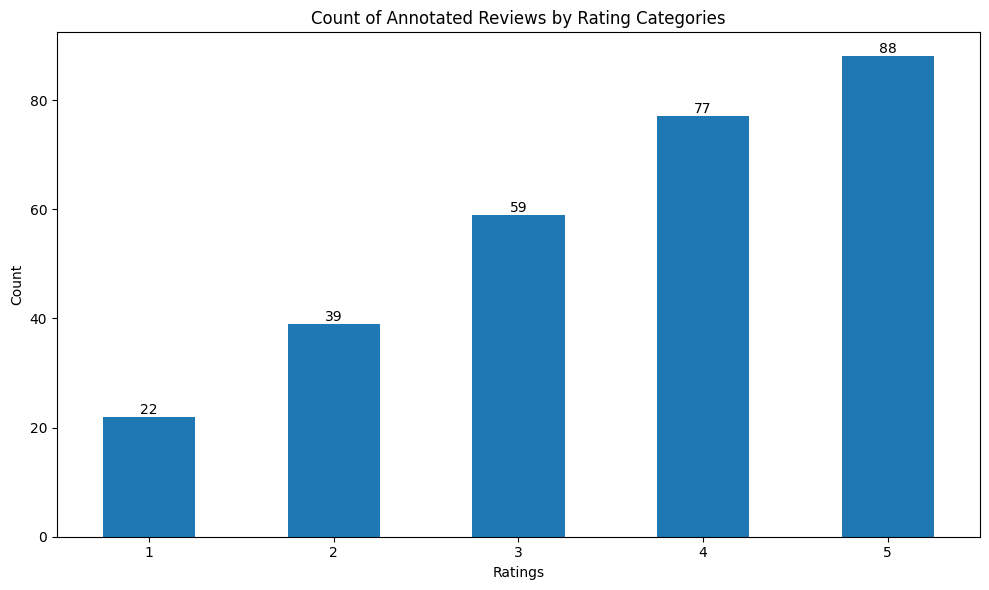

In [ ]:
tag_counts = tmp.groupby('rating').count()['guid']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
ax = tag_counts.plot(kind='bar')  # You can change the color

# Adding titles and labels
plt.title('Count of Annotated Reviews by Rating Categories')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation = 0)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels

for i in ax.containers:
    ax.bar_label(i,)

# Show the plot
plt.show()



number of institutions in the sample: 95
count    285.000000
mean       2.347368
std        1.239904
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: num_topics, dtype: float64


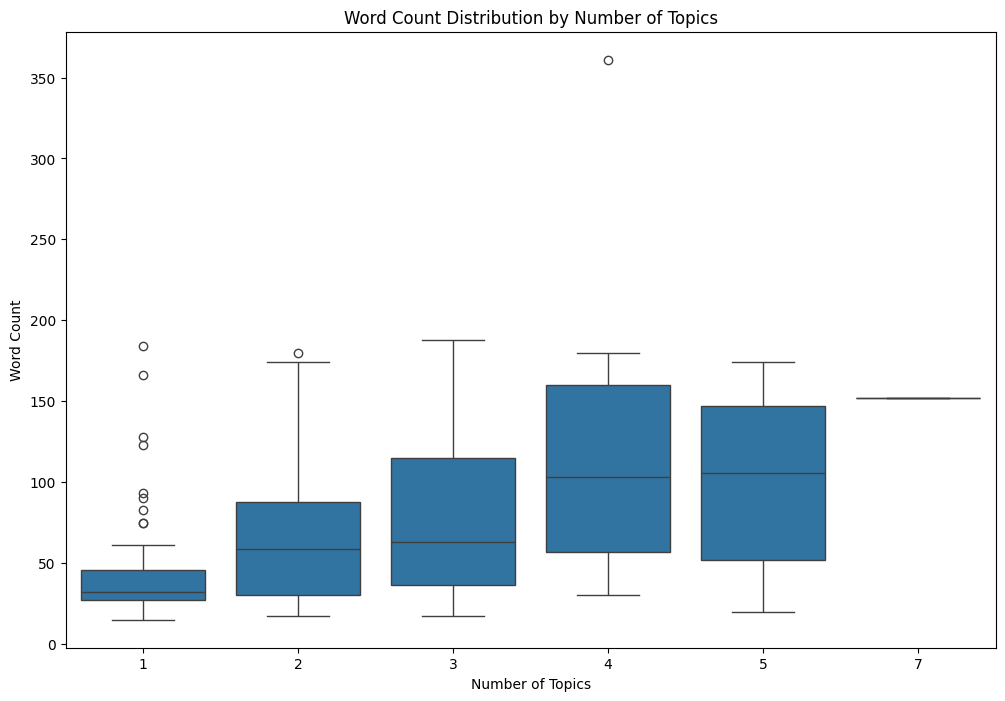

num_topics
1    89
2    81
3    63
4    33
5    18
7     1
Name: count, dtype: int64

In [ ]:
import seaborn as sns

# number of schools represented in the sample
nschool = tmp['entity_id'].nunique()
print(f'number of institutions in the sample: {nschool}')
# average number of topics
tmp['num_topics'] = tmp['topic'].apply(lambda x: len(x.split(','))).astype('category')
ntopic_summary = tmp['num_topics'].astype('int64').describe()
print(ntopic_summary)
# word count per review
tmp['word_count'] = tmp['body'].str.split().str.len()
# print(word_count)

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='num_topics', y='word_count', data=tmp)
plt.title('Word Count Distribution by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Word Count')
# plt.grid(True)
plt.show()


tmp['num_topics'].value_counts()